# Libraries and Helper Function

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pylab
from ast import literal_eval
%matplotlib inline

In [2]:
def model_results(model_number, df):
    print("Log Loss: {0:.4f}".format(df.iloc[model_number]['log_loss']))
    print("Accuracy: {0:.4f}".format(df.iloc[model_number]['accuracy']))
    cm = df_chosen_model.iloc[model_number]['confusion_matrix']
    cm = cm.replace('\n',' ').replace('  ', ',').replace(',,', ',')
    cm = np.matrix(literal_eval(cm))
    cm = cm.astype('float') / cm.sum(axis=1)
    df_cm = pd.DataFrame(cm, index = ['low', 'medium', 'high'], columns = ['low', 'medium', 'high'])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, fmt='.3f', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
def get_feature_importance(model_number, df, num_features = None):
    feature_importance = df_chosen_model.iloc[model_number]['feature_importances']
    feature_importance = literal_eval(feature_importance.replace('  ', ',').replace(',,', ',').replace(',,', ',').replace(',,', ','))
    indices = np.argsort(feature_importance)[::-1]
    feature_importance = [feature_importance[i] for i in indices]
    predictors = literal_eval(df.iloc[model_number]['predictors'])
    predictors = [predictors[i] for i in indices]
    predictors_index = range(1, len(predictors) + 1)
    num_features = len(predictors) if num_features is None else num_features
    plt.bar(predictors_index[:num_features], feature_importance[:num_features], align = 'center')
    plt.xticks(predictors_index[:num_features], predictors[:num_features], rotation = 'vertical')
    plt.show()

# Load Data

In [4]:
df_model_performance = pd.read_csv('Model Evaluation/model_performance.csv')
df_chosen_model = pd.read_csv('Model Evaluation/chosen_model.csv')

In [5]:
df_model_performance.head()

,cv_folds,model,parameters,predictors,score,score_std,timestamp
0,5.0,log,"{'multi_class': 'multinomial', 'C': 0.001, 'so...","['bathrooms', 'bedrooms', 'price']",-0.992815,0.004374,2017-03-16 18:17
1,5.0,log,"{'multi_class': 'multinomial', 'C': 0.001, 'so...","['bathrooms', 'bedrooms', 'price']",-0.718412,0.002610,2017-03-16 18:17
2,5.0,log,"{'multi_class': 'multinomial', 'C': 0.01, 'sol...","['bathrooms', 'bedrooms', 'price']",-0.990766,0.004427,2017-03-16 18:17
3,5.0,log,"{'multi_class': 'multinomial', 'C': 0.01, 'sol...","['bathrooms', 'bedrooms', 'price']",-0.717009,0.003120,2017-03-16 18:17
4,5.0,log,"{'multi_class': 'multinomial', 'C': 0.1, 'solv...","['bathrooms', 'bedrooms', 'price']",-0.990610,0.004403,2017-03-16 18:17


In [6]:
df_chosen_model.head()

,accuracy,confusion_matrix,feature_importances,log_loss,model,parameters,predictors,timestamp
0,0.697628,[[9405 98 1]\n [2943 60 1]\n [1010 ...,NaN,0.723703,log,"{'multi_class': 'multinomial', 'C': 1000, 'sol...","['bathrooms', 'bedrooms', 'price']",2017-03-16 18:17
1,0.707793,[[9367 104 33]\n [2853 109 42]\n [ 873 ...,[ 0.07521602 0.14711349 0.77767049],0.699523,rf,"{'max_features': 'auto', 'n_estimators': 500, ...","['bathrooms', 'bedrooms', 'price']",2017-03-16 18:30
2,0.709708,[[9387 67 50]\n [2855 91 58]\n [ 849 ...,[ 0.11066017 0.21640541 0.67293441],0.693431,xgb,"{'n_estimators': 500, 'objective': 'multi:soft...","['bathrooms', 'bedrooms', 'price']",2017-03-16 18:41
3,0.693503,[[9258 245 1]\n [2855 149 0]\n [ 967 ...,NaN,0.709257,log,"{'multi_class': 'multinomial', 'C': 1000, 'sol...","['price', 'bedrooms', 'bathrooms', 'descriptio...",2017-03-16 18:59
4,0.713465,[[9160 310 34]\n [2567 379 58]\n [ 733 ...,[ 0.37278375 0.10014773 0.02617405 0.189851...,0.653079,rf,"{'max_features': 'auto', 'n_estimators': 500, ...","['price', 'bedrooms', 'bathrooms', 'descriptio...",2017-03-16 19:25


# Performance of All CV Models

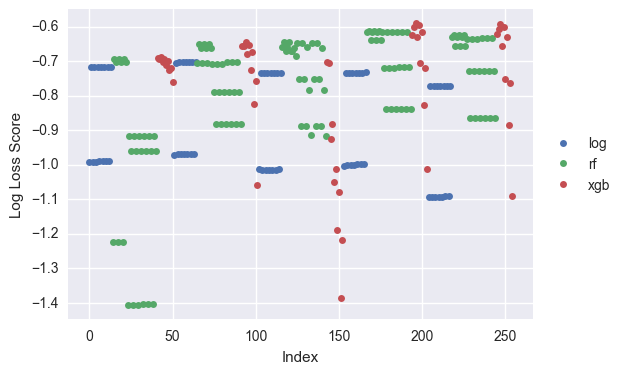

In [7]:
models_performance = df_model_performance[df_model_performance['model'] != 'base'].groupby('model')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in models_performance:
    ax.plot(group.index, group.score, marker='o', linestyle='', ms=5, label=name)
ax.legend(numpoints=1, bbox_to_anchor=(1.1, 0.5), loc = 'center')
plt.xlabel('Index')
plt.ylabel('Log Loss Score')
plt.show()

# Performance of Chosen Models

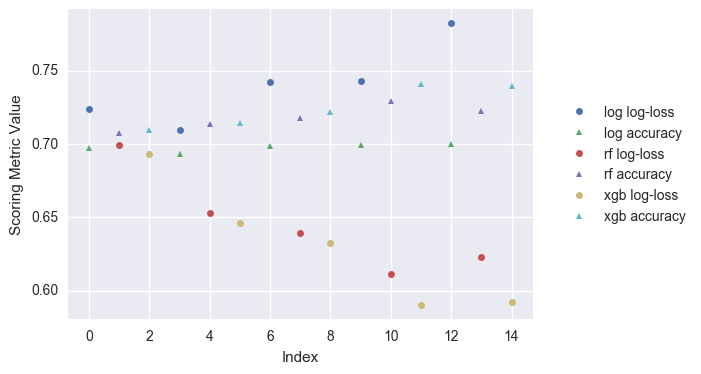

In [8]:
chosen_models = df_chosen_model[df_chosen_model['model'] != 'base'].groupby('model')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in chosen_models:
    ax.plot(group.index, group.log_loss, marker='o', linestyle='', ms=5, label=name + ' log-loss')
    ax.plot(group.index, group.accuracy, marker='^', linestyle='', ms=5, label=name + ' accuracy')
ax.legend(numpoints=1, bbox_to_anchor=(1.2, 0.5), loc = 'center')
plt.xlabel('Index')
plt.ylabel('Scoring Metric Value')
plt.show()

# Individual Model Analysis

### Model Results

Log Loss: 0.5922
Accuracy: 0.7395


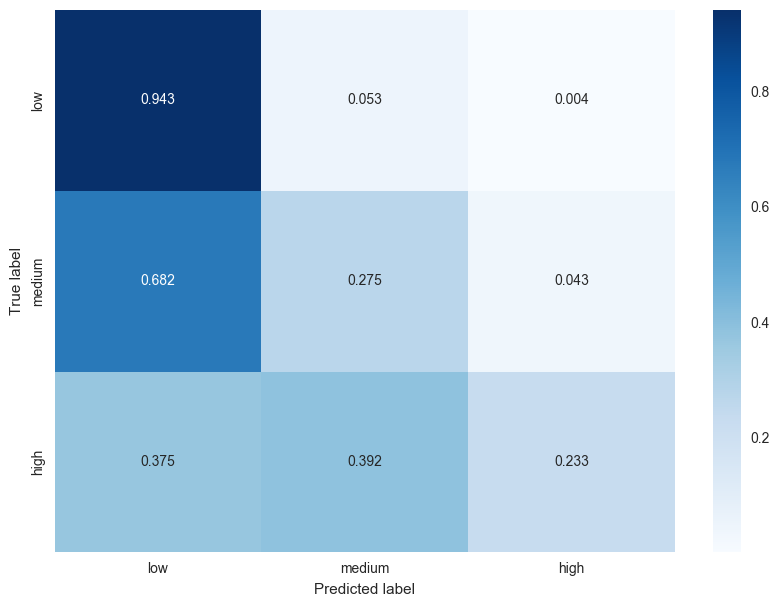

In [19]:
model_results(14, df_chosen_model)

### Feature Importance

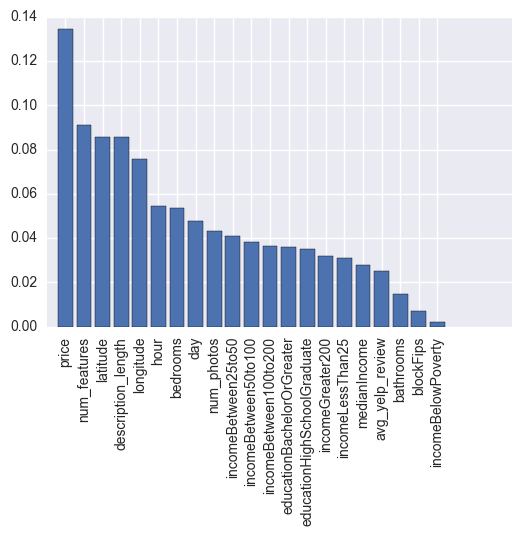

In [11]:
get_feature_importance(14, df_chosen_model)